<a href="https://colab.research.google.com/github/gabrielalastra/FemicidesSP/blob/main/FemicideSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [100]:
#db = pd.read_excel('/content/Feminicidio_2015_2022.xlsx', sheet_name=None)
db = pd.read_excel('/content/Feminicidio_2015_2022.xlsx', sheet_name='2021')

In [ ]:
#display(db)
#display(db['2021'])

In [102]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  140 non-null    object        
 1   SECCIONAL_CIRCUNSCRICAO     140 non-null    object        
 2   MUNICIPIO_CIRCUNSCRICAO     140 non-null    object        
 3   DP_CIRCUNSCRICAO            140 non-null    object        
 4   HD                          135 non-null    float64       
 5   Nº DE VÍT HD                140 non-null    int64         
 6   ID_DELEGACIA                140 non-null    int64         
 7   MÊS ESTATISTICA             140 non-null    int64         
 8   ANO ESTATISTICA             140 non-null    int64         
 9   DATAHORA_REGISTRO_BO        140 non-null    datetime64[ns]
 10  NUM_BO                      140 non-null    int64         
 11  ANO_BO                      140 non-null    int64         

<h2 align='center'>Cleaning</h2>
<hr color='yellow'>

In [103]:
db.value_counts()

DEPARTAMENTO_CIRCUNSCRICAO  SECCIONAL_CIRCUNSCRICAO  MUNICIPIO_CIRCUNSCRICAO  DP_CIRCUNSCRICAO               HD   Nº DE VÍT HD  ID_DELEGACIA  MÊS ESTATISTICA  ANO ESTATISTICA  DATAHORA_REGISTRO_BO  NUM_BO  ANO_BO  MUNICIPIO_ELABORACAO  DP_ELABORACAO                   SEC_ELABORACAO                    DEP_ELABORACAO                     DATA_FATO   HORA_FATO     DESC_TIPOLOCAL       LOGRADOURO                              NUMERO_LOGRADOURO  LATITUDE    LONGITUDE   TIPO_PESSOA  SEXO_PESSOA  IDADE_PESSOA  DATA_NASCIMENTO_PESSOA  COR_PELE       PROFISSAO            NATUREZA_APURADA  DESDOBRAMENTO                                                      
DECAP                       1ª SEC                   São Paulo                006 DP - Cambuci               1.0  1             10108         9                2021             2021-09-18 00:00:00   5116    2021    S.PAULO               08º D.P. BRAS                   DEL.SEC.1º CENTRO                 DECAP                              2021-09-18

In [104]:
db.isnull().value_counts()

DEPARTAMENTO_CIRCUNSCRICAO  SECCIONAL_CIRCUNSCRICAO  MUNICIPIO_CIRCUNSCRICAO  DP_CIRCUNSCRICAO   HD     Nº DE VÍT HD  ID_DELEGACIA  MÊS ESTATISTICA  ANO ESTATISTICA  DATAHORA_REGISTRO_BO  NUM_BO  ANO_BO  MUNICIPIO_ELABORACAO  DP_ELABORACAO  SEC_ELABORACAO  DEP_ELABORACAO  DATA_FATO  HORA_FATO  DESC_TIPOLOCAL  LOGRADOURO  NUMERO_LOGRADOURO  LATITUDE  LONGITUDE  TIPO_PESSOA  SEXO_PESSOA  IDADE_PESSOA  DATA_NASCIMENTO_PESSOA  COR_PELE  PROFISSAO  NATUREZA_APURADA  DESDOBRAMENTO
False                       False                    False                    False              False  False         False         False            False            False                 False   False   False                 False          False           False           False      False      False           False       True               True      True       False        False        False         False                   False     False      False             False            76
                                  

In [105]:
db = db.drop(columns=['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'HD', 'LATITUDE', 'LONGITUDE'])

In [106]:
db=db.drop(columns=['SEC_ELABORACAO', 'DP_ELABORACAO', 'DEP_ELABORACAO'])

In [107]:
db=db.drop(columns=['NUMERO_LOGRADOURO', 'LOGRADOURO', 'Nº DE VÍT HD', 'NUM_BO'])

In [108]:
db['DESDOBRAMENTO'].value_counts()

Feminicídio-contra a mulher por razões da condição de sexo feminino                139
A pena do feminicídio é aumentada de 1/3 (um terço) até a metade se o crime for      1
Name: DESDOBRAMENTO, dtype: int64

In [109]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MUNICIPIO_CIRCUNSCRICAO  140 non-null    object        
 1   DP_CIRCUNSCRICAO         140 non-null    object        
 2   ID_DELEGACIA             140 non-null    int64         
 3   MÊS ESTATISTICA          140 non-null    int64         
 4   ANO ESTATISTICA          140 non-null    int64         
 5   DATAHORA_REGISTRO_BO     140 non-null    datetime64[ns]
 6   ANO_BO                   140 non-null    int64         
 7   MUNICIPIO_ELABORACAO     140 non-null    object        
 8   DATA_FATO                140 non-null    datetime64[ns]
 9   HORA_FATO                140 non-null    object        
 10  DESC_TIPOLOCAL           140 non-null    object        
 11  TIPO_PESSOA              140 non-null    object        
 12  SEXO_PESSOA              140 non-nul

In [110]:
db['ANO ESTATISTICA'].value_counts()

2021    140
Name: ANO ESTATISTICA, dtype: int64

<h2 align='center'>Patterns</h2>
<hr color='yellow'>

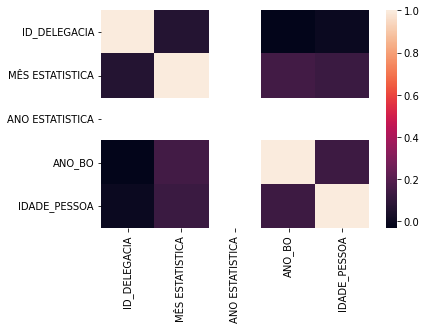

In [111]:
sns.heatmap(db.corr())

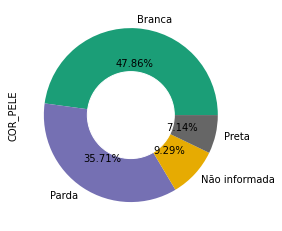

In [112]:
db['COR_PELE'].value_counts().plot(kind='pie',
                                   colormap='Dark2',
                                   autopct='%.2f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

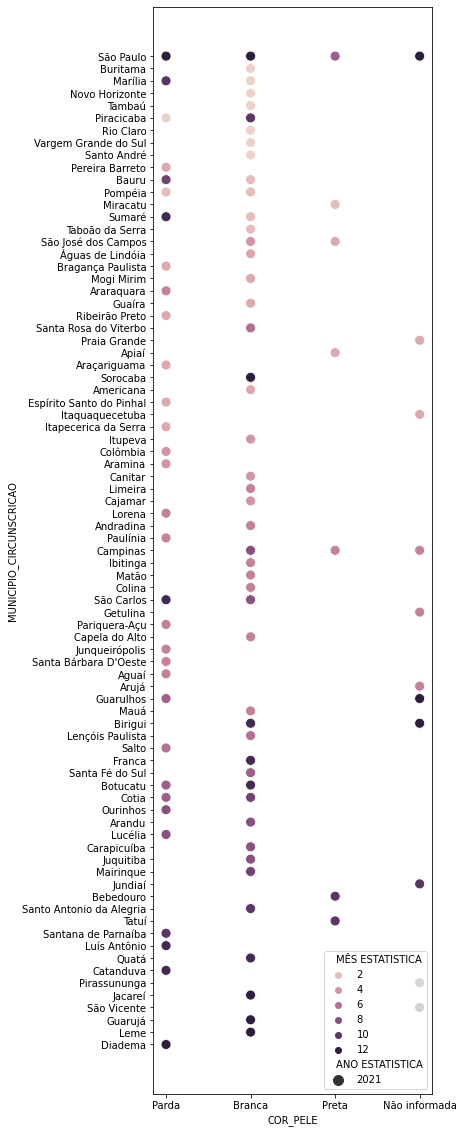

In [117]:
plt.figure(figsize=[5,20])
sns.scatterplot(data=db, y="MUNICIPIO_CIRCUNSCRICAO", x="COR_PELE", 
                hue='MÊS ESTATISTICA', size='ANO ESTATISTICA',
                sizes=(100,200))


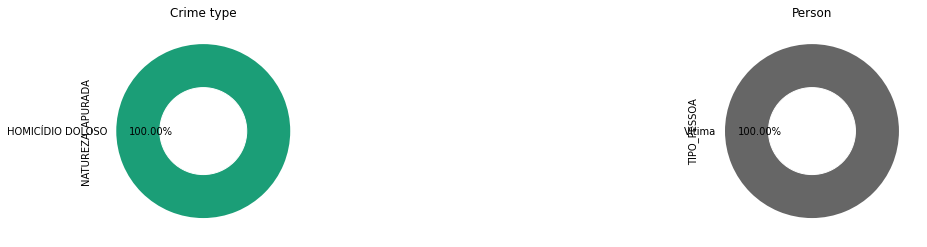

In [114]:
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
db['NATUREZA_APURADA'].value_counts().plot(kind='pie',
                                   colormap='Dark2',
                                   autopct='%.2f%%')
plt.title('Crime type')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.subplot(1,2,2)
db['TIPO_PESSOA'].value_counts().plot(kind='pie',
                                   colormap='Dark2_r',
                                   autopct='%.2f%%')
plt.title('Person')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


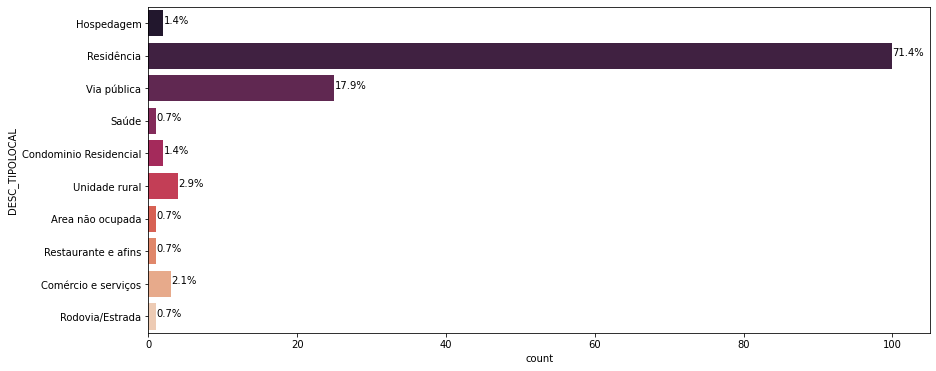

In [115]:
plt.figure(figsize=[14,6])
ax = sns.countplot(y="DESC_TIPOLOCAL", data=db, palette='rocket')
total = len(db['DESC_TIPOLOCAL'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

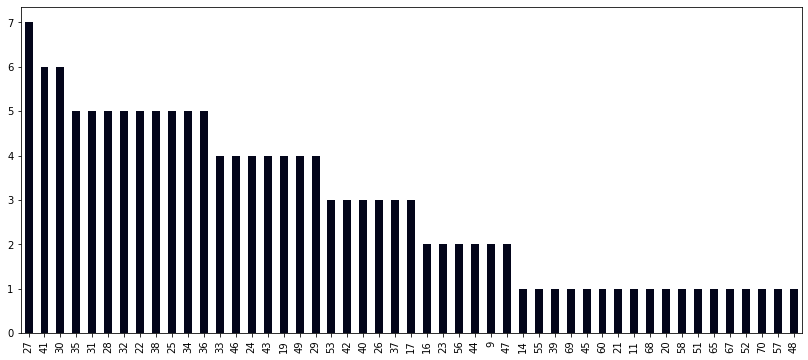

In [116]:
plt.figure(figsize=[14,6])
db['IDADE_PESSOA'].value_counts().plot(kind='bar',
                                   colormap='rocket')